# Support Vector Machine

#### Find $\theta$ with a large margin. Decision boundary: $x\theta +b=0$

#### Normalize $\theta, b$, so that $\min{|x_{i}\theta +b|} = 1$
#### margin $\gamma = \min{\frac{|x_{i}\theta +b|}{||\theta||}} = \frac{1}{||\theta||}$
#### We want to maximize $\gamma$, so consider the dual problem, where we  minimize $|\theta|=\frac{1}{\gamma}$

#### $L(\theta, b, \lambda)  = \frac{1}{2}||\theta||^{2} - \sum^{n}_{i=1}\lambda_{i} [y_{i}(x_{i}\theta+b)-1], \lambda_{i}\ge 0$

In [1]:
import numpy as np

class SVM:
    def __init__(self, lr_rate=0.001, param_lambda=10, n_iters=1000):
        self.lr = lr_rate
        self.param_lambda = param_lambda
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y_label = np.where(y <= 0, -1, 1)
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_label[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                # when labeled correctly
                # why param_lambda here!?
                if condition:
                    self.w -= self.lr * (2  * self.w)
                # when labeled wrong
                else:
                    self.w -= self.lr * (2 * self.w - self.param_lambda * np.dot(x_i, y_label[idx]))    
                    self.b -= self.lr * self.param_lambda * y_label[idx]
    def predict(self, X):
        prediction = np.dot(X, self.w) - self.b
        return np.sign(prediction)

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
# predictions = clf.predict(X)

print(clf.w, clf.b)

[0.34297569 0.32576816] -1.480000000000001


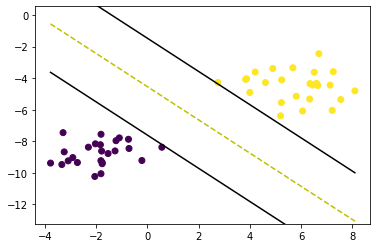

In [3]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()